# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [2]:
import pandas as pd

# load the training dataset
data = pd.read_csv('wine.csv')
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [3]:
# Your code to evaluate data, and train and evaluate a classification model

Check for missing values

In [4]:
# Check for missing values
data.isna().sum()

,0
Alcohol,0
Malic_acid,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0
Color_intensity,0


No missing values shows a complete set of data. Since all the features are all numerical variables. A descriptive statistics is appropriate to show the distribution of the data

In [5]:
#Descriptive statistics
data.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Seperate the columns into features and labels

In [6]:
# X represents the features while y represents the label
X = data.drop(['WineVariety'], axis = 1)
y = data['WineVariety']

Now let's compare the features with the labels. Although labels have been inputed as an int, in the actual sense, it is still a categorical variable i.e. the wine variety could either be Variety A, B or C

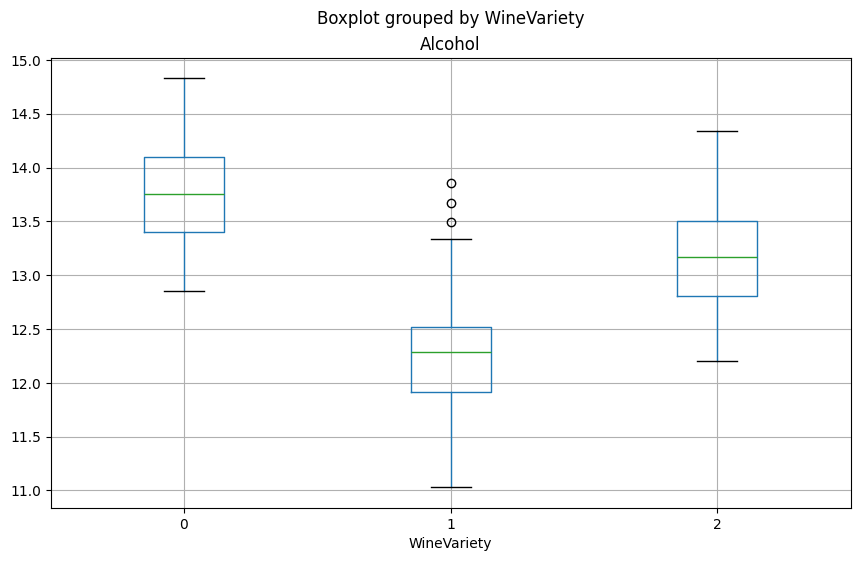

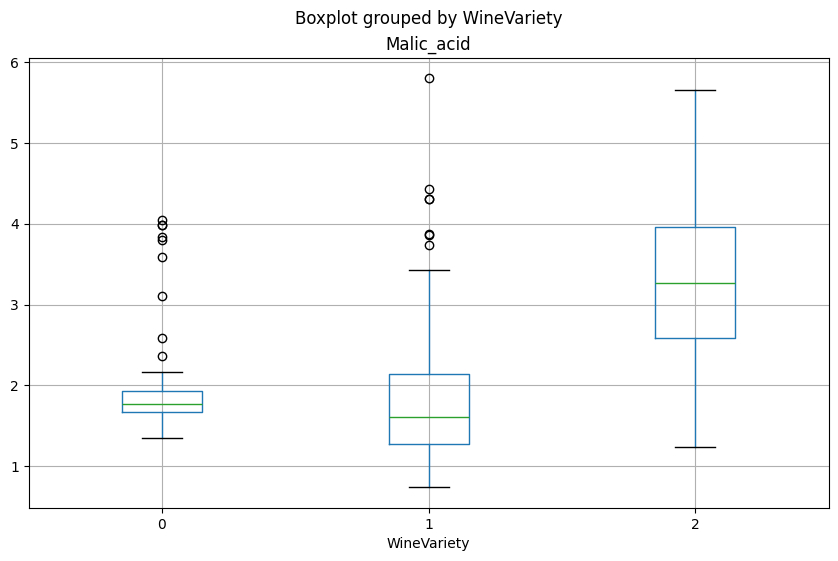

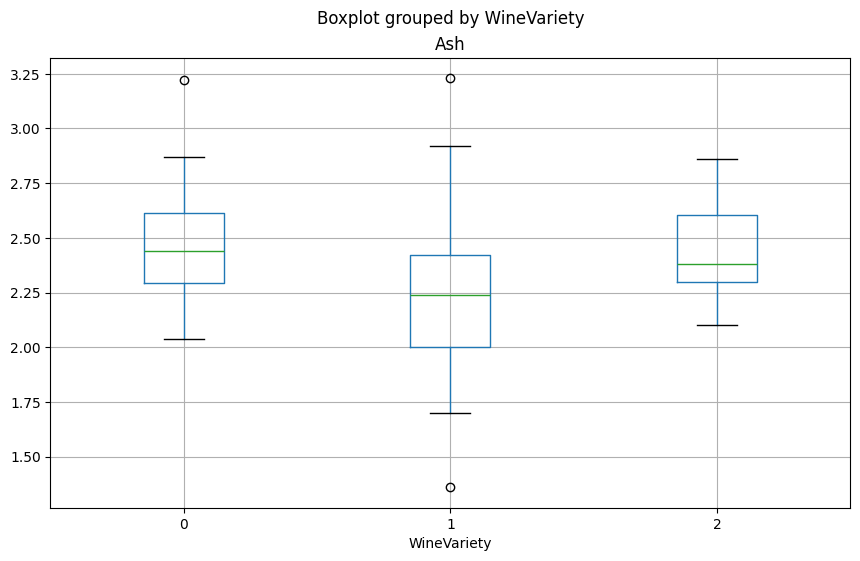

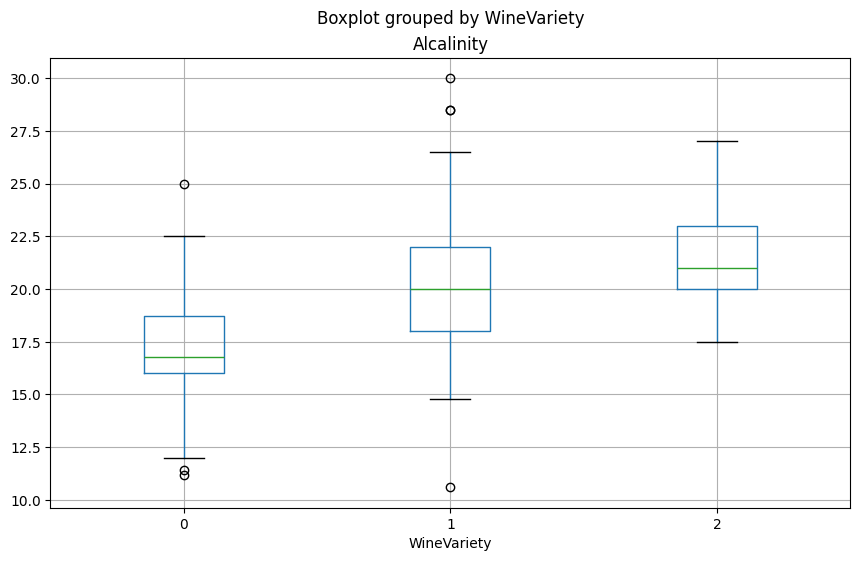

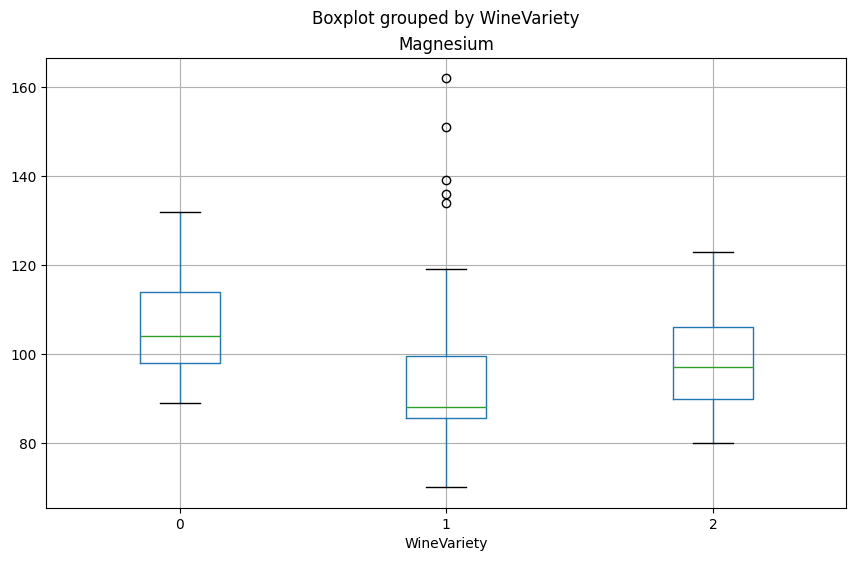

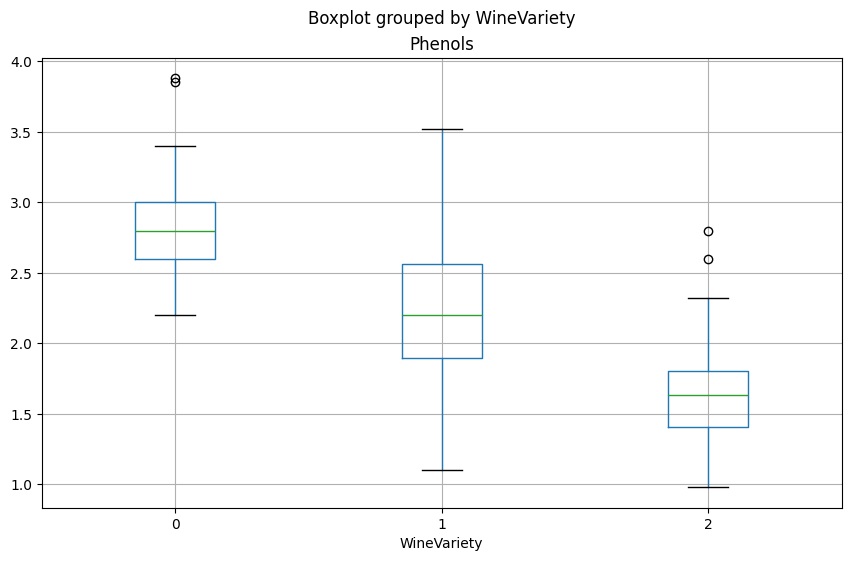

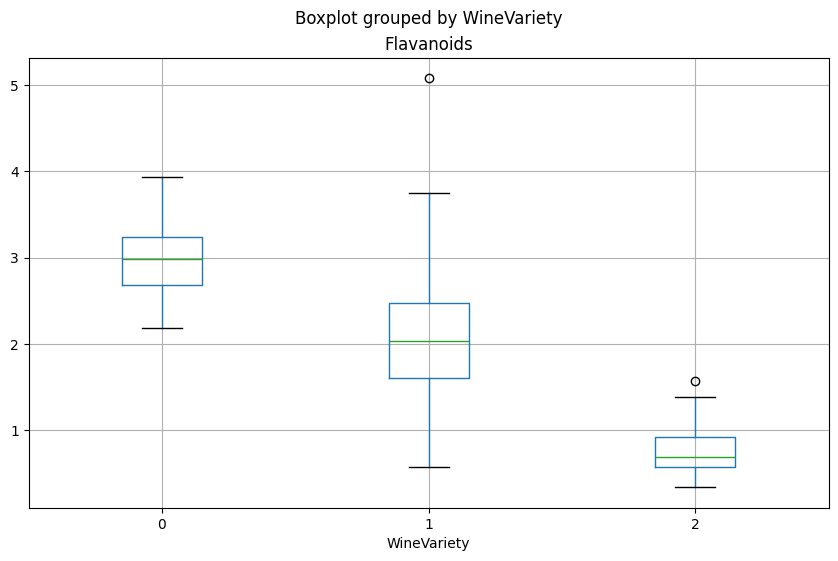

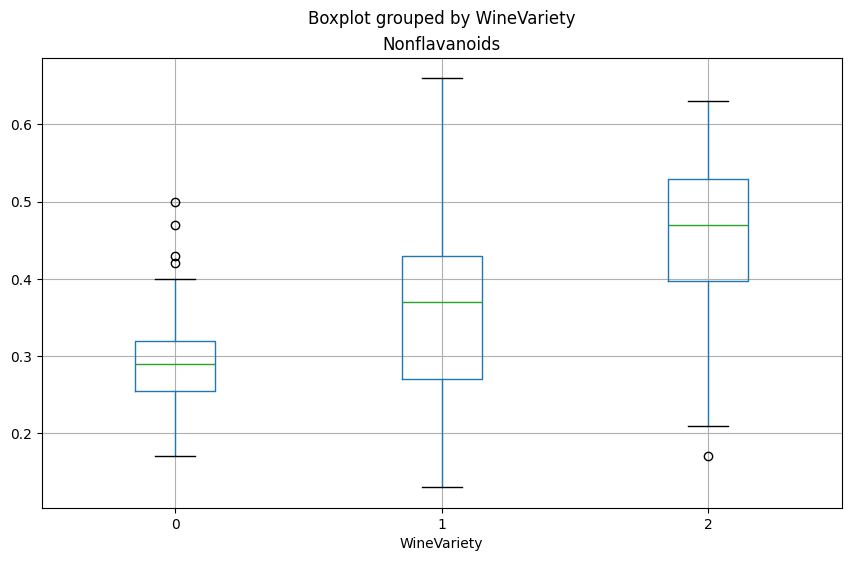

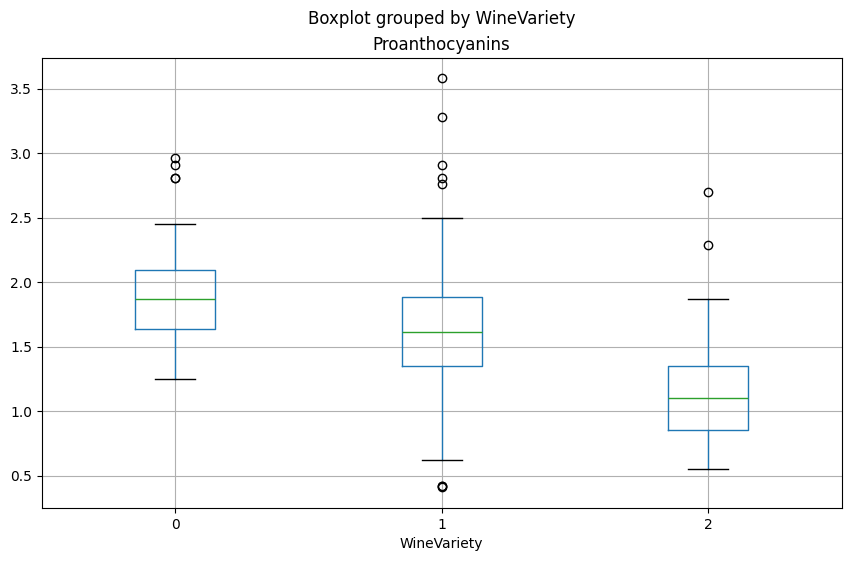

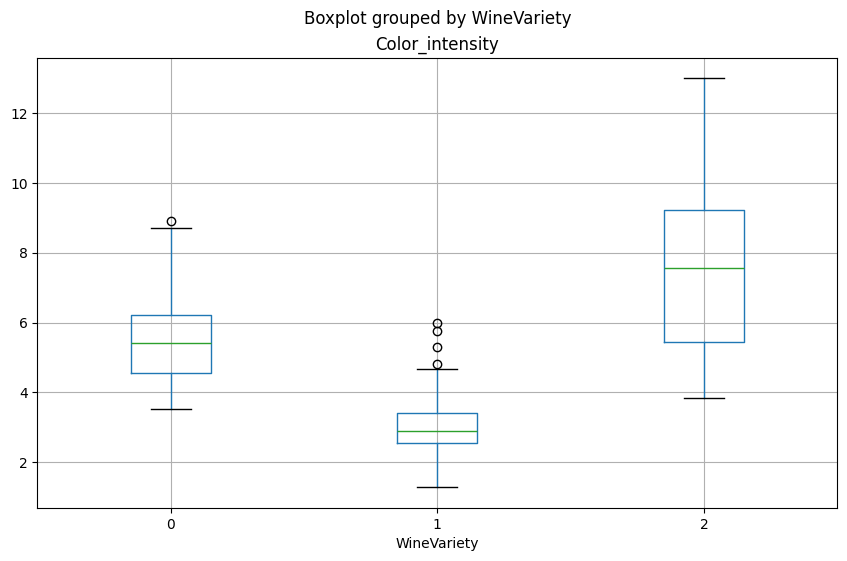

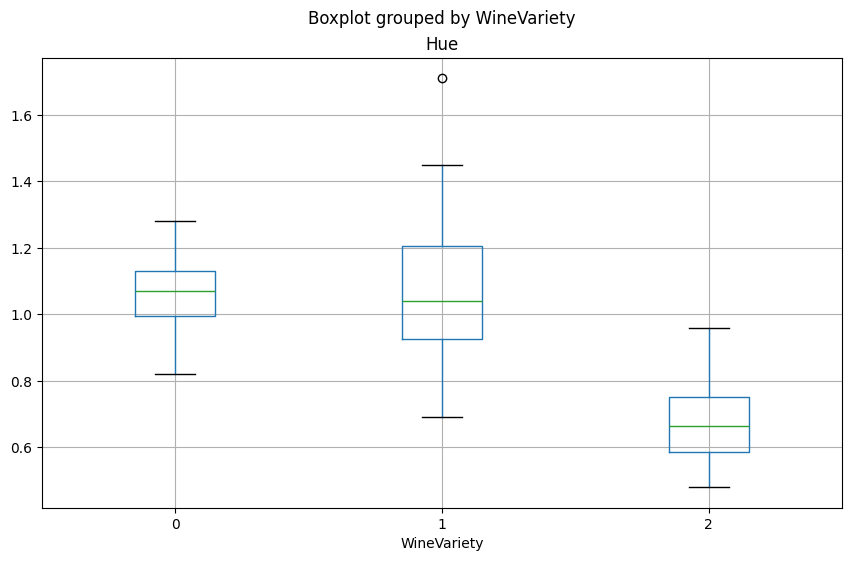

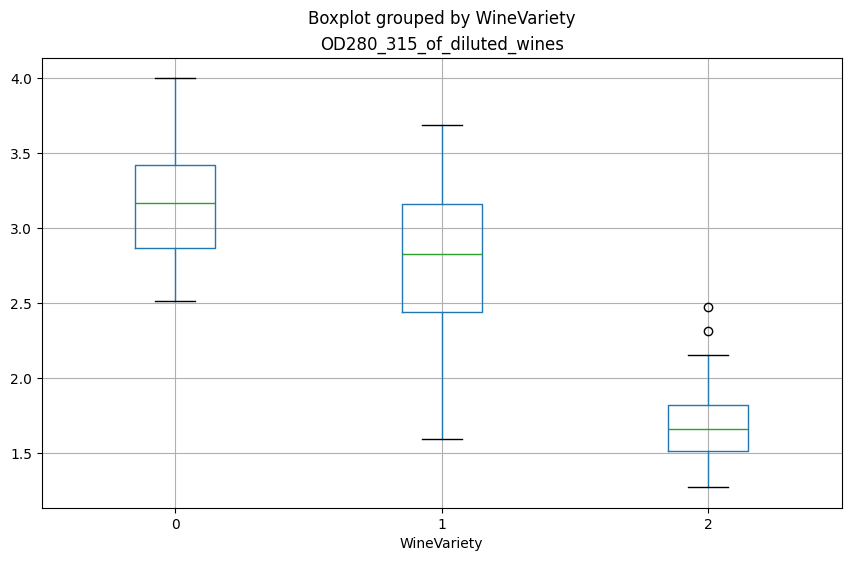

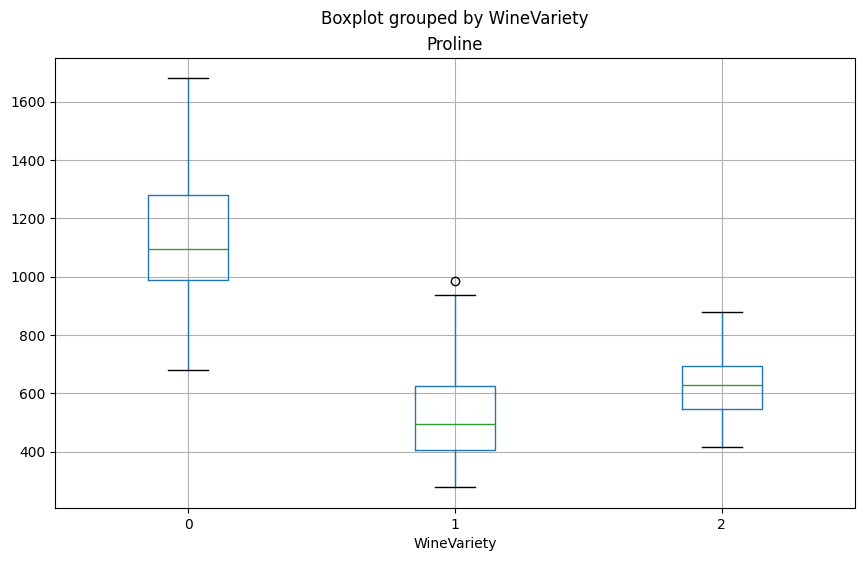

In [7]:
features = ['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280_315_of_diluted_wines','Proline']
label = 'WineVariety'

import matplotlib.pyplot as plt

for col in features:
    data.boxplot(column = col, by = label, figsize = (10,6))
    plt.title(col)
plt.show()

Most of the features showed a noticeable difference in the distribution for each label value.

In [8]:
#Split the data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 726)

In [9]:
X_train.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
91,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
47,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380


In [10]:
print('Number of rows for X_train:', len(X_train))
print('Number of rows for X_test:', len(X_test))
print('Number of rows for y_train:', len(y_train))
print('Number of rows for y_test:', len(y_test))

Number of rows for X_train: 142
Number of rows for X_test: 36
Number of rows for y_train: 142
Number of rows for y_test: 36


# Building a Logistic Regression Model and Training the Data

In [11]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
reg = 0.01
LR_model = LogisticRegression(C=1/reg, solver="liblinear")
LR_model.fit(X_train, y_train)

LogisticRegression(C=100.0, solver='liblinear')

In [12]:
#Predict with the Logistic Regression Model
LR_predictions = LR_model.predict(X_test)
print('Predicted labels: ', LR_predictions)
print('Actual labels:    ' ,y_test.values)

Predicted labels:  [1 1 2 2 2 2 0 1 2 2 1 0 0 0 2 1 1 1 0 1 1 1 2 0 0 1 0 1 2 2 1 2 1 2 0 0]
Actual labels:     [1 1 2 2 2 2 0 1 2 2 1 0 0 0 2 1 1 1 0 1 2 1 2 1 0 1 0 1 2 2 1 2 1 2 0 0]


In [13]:
#Check Accuracy of the Linear Regression Model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, LR_predictions)

0.9444444444444444

But Accuracy alone is not sufficient to determine how good the model is

In [14]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.93      0.93      0.93        14
           2       1.00      0.92      0.96        13

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



Recall that the objective is for the recall metric to have a value of over 0.95(95%). Since this is a multi-class classification problem, the individual recall score won't be considered.
A look at the classification report showed the macro and weighted average still fall below this benchmark i.e. the model is not at the optimal level yet. Let's try other models

# Ensemble Model

In [15]:
#Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(n_estimators=100)
RFC_model.fit(X_train, y_train)
print(RFC_model)

RandomForestClassifier()


In [16]:
#Predict with the RandomForestClassifier model
RFC_predictions = RFC_model.predict(X_test)
print('Predicted labels: ', RFC_predictions)
print('Actual labels:    ' ,y_test.values)

Predicted labels:  [1 1 2 2 2 2 0 1 2 2 1 0 0 0 2 1 1 1 0 1 2 1 2 1 0 1 0 1 2 2 1 2 1 2 0 0]
Actual labels:     [1 1 2 2 2 2 0 1 2 2 1 0 0 0 2 1 1 1 0 1 2 1 2 1 0 1 0 1 2 2 1 2 1 2 0 0]


In [17]:
#Check the recall score
print(classification_report(y_test, RFC_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        13

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Here the recall score is well above the benchmark of over 0.95. Although a recall score of 1.00 might be too good to be true

# Save the Model

In [18]:
import joblib

with open('Wine_Classification_Model.pkl', 'wb') as file:
    joblib.dump(RFC_model, file)

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [19]:
# Your code to predict classes for the two new samples
X_train.columns

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline'],
      dtype='object')

# Load the Model

In [20]:
#Load Model
loaded_model = joblib.load(filename)

NameError: name 'filename' is not defined

In [ ]:
#Create array that will be predicted
classes = ['Variety A','Variety B','Variety C']

import numpy as np
new_data = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
print(new_data)

[[1.372e+01 1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00
  1.900e-01 2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]
 [1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
  2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]]


# Make Predictions

In [ ]:
predictions = loaded_model.predict(new_data)
for prediction in predictions:
    print(prediction, '(' + classes[prediction] +')')

0 (Variety A)
1 (Variety B)
